In [615]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/Facebook_Ads_2.csv',encoding='cp1252')

df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [616]:
df.shape

(499, 6)

In [617]:
df.isnull().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [618]:
df.duplicated().sum()

0

In [619]:
df.info

<bound method DataFrame.info of                Names                                             emails  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
494            Rigel            egestas.blandit.Nam@semvitaealiquam.com   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   

                   Country  Time Spent on Site       Salary  Clicke

In [620]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Target feature - Clicked')

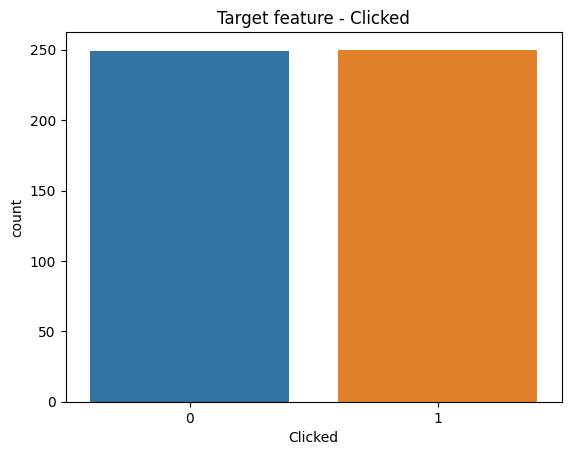

In [621]:
df['Clicked'].value_counts()

sns.countplot(x=df['Clicked'])
plt.title('Target feature - Clicked')

<AxesSubplot:xlabel='Time Spent on Site', ylabel='Salary'>

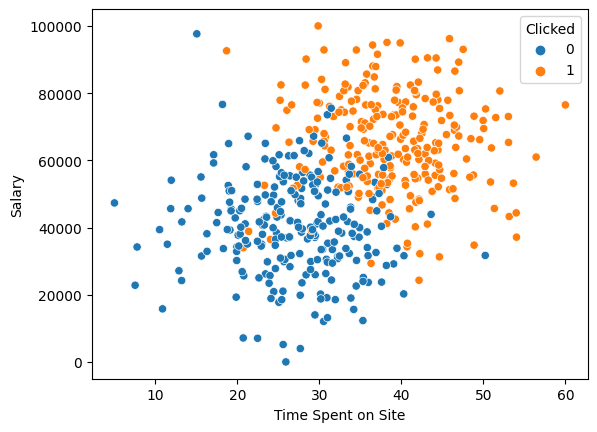

In [622]:



sns.scatterplot(x = 'Time Spent on Site', y = 'Salary', data = df, hue='Clicked' )

<AxesSubplot:xlabel='Clicked', ylabel='Time Spent on Site'>

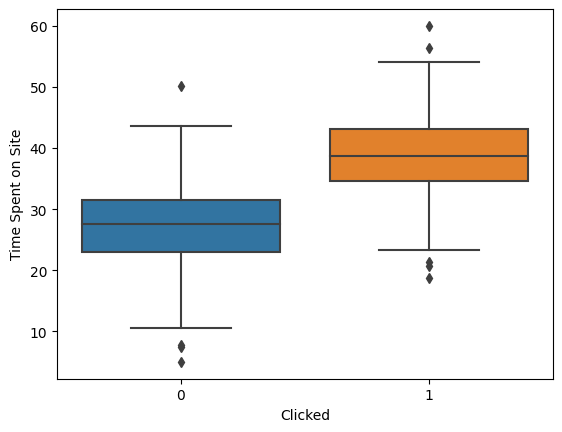

In [623]:
sns.boxplot(x = df['Clicked'], y =  df['Time Spent on Site'], data=df )

<AxesSubplot:xlabel='Clicked', ylabel='Salary'>

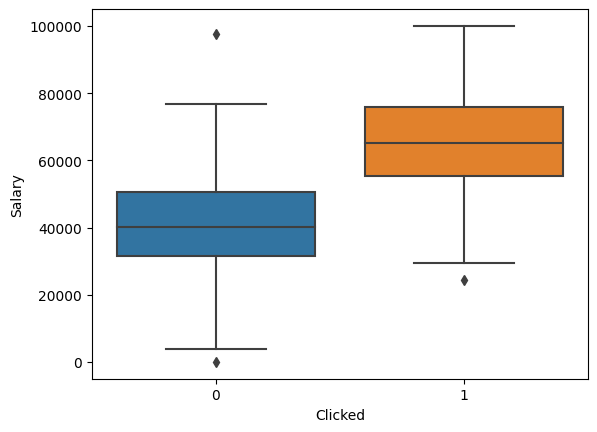

In [624]:
sns.boxplot(x = df['Clicked'], y =  df['Salary'], data=df )

In [625]:

target = df['Clicked']

df.drop(['Clicked', 'Names', 'emails', 'Country'], axis=1, inplace=True)


In [626]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
scaled_data= scaler.fit_transform(df)



In [627]:

scaled_df = pd.DataFrame(scaled_data, columns= names)
scaled_df.head()



,Time Spent on Site,Salary
0,0.375448,0.553211
1,0.499202,0.790449
2,0.289927,0.410868
3,0.891624,0.371308
4,0.531813,0.373426


In [628]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.3)

In [629]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [630]:
log_reg.score(X_test,y_test)

0.8933333333333333

In [631]:
y_pred=log_reg.predict(X_test)

In [632]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [633]:
accuracy_score(y_test,y_pred)

0.8933333333333333

In [634]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        75
           1       0.88      0.91      0.89        75

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



<AxesSubplot:>

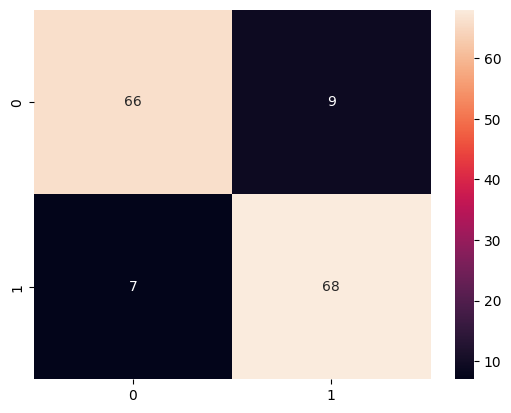

In [635]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [636]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.8866666666666667

In [637]:

svc_predict=model.predict(X_test)
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        75
           1       0.87      0.91      0.89        75

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



<AxesSubplot:>

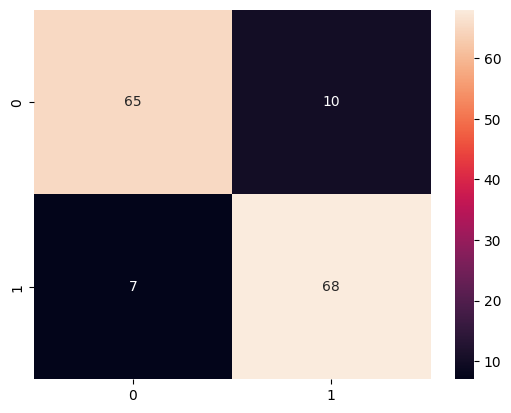

In [638]:
sns.heatmap(confusion_matrix(y_test,svc_predict,), annot=True)